In [2]:
!pip install langgraph langchain cassio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.5/98.5 kB 7.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 45.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.3/45.3 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.9/3.9 MB 92.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 399.7/399.7 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 290.2/290.2 kB 23.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 378.0/378.0 kB 30.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 141.9/141.9 kB 13.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.6 MB/s eta 0:00:00
  Attempting uninstall: tenacity
    Found existing 

In [3]:
import cassio
# connection of the Astra DB

ASTRA_DB_APPLICATION_TOKEN = "AstraCS:******"
ASTRA_DB_ID = "*****"

cassio.init(
    token = ASTRA_DB_APPLICATION_TOKEN,
    database_id=ASTRA_DB_ID
)

In [4]:
!pip install langchain-community

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 61.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.3/49.3 kB 4.4 MB/s eta 0:00:00


In [5]:
!pip install -U tiktoken langchain-groq langchain langchain_huggingface langgraph

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 49.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 599.2/599.2 kB 37.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 73.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 273.8/273.8 kB 17.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 9.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.5/106.5 kB 9.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 69.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.9/88.9 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 75.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [12]:
# Build Index

from langchain.text_splitter import RecursiveCharacterTextSplitter
from langchain_community.document_loaders import WebBaseLoader

# Docs to Index
urls = [
    "https://lilianweng.github.io/posts/2023-06-23-agent/",
    "https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/",
    "https://lilianweng.github.io/posts/2023-10-25-adv-attack-llm/"
]

# load the url

docs = [WebBaseLoader(url).load() for url in urls]
docs_list = [item for sublist in docs for item in sublist]

# text_splitter = RecursiveCharacterTextSplitter(chunk_size=500, chunk_overlap=0)
text_splitter = RecursiveCharacterTextSplitter.from_tiktoken_encoder(chunk_size=500, chunk_overlap=0)
docs_split = text_splitter.split_documents(docs_list)

In [13]:
print(docs_list)

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en'}, page_content='\n\n\n\n\n\nLLM Powered Autonomous Agents | Lil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil\'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Auton

In [14]:
docs_split

[Document(metadata={'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log", 'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en'}, page_content="LLM Powered Autonomous Agents | Lil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nLil'Log\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\n\nPosts\n\n\n\n\nArchive\n\n\n\n\nSearch\n\n\n\n\nTags\n\n\n\n\nFAQ\n\n\n\n\nemojisearch.app\n\n\n\n\n\n\n\n\n\n      LLM Powered Autonomous Agents\n

In [15]:
from langchain_huggingface import HuggingFaceEmbeddings
embeddings = HuggingFaceEmbeddings(model_name="sentence-transformers/all-MiniLM-L6-v2")

/usr/local/lib/python3.10/dist-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm, trange


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [17]:
from langchain.vectorstores.cassandra import Cassandra
astra_vector_store = Cassandra(
    embedding=embeddings,
    table_name ="qa_mini_demo",
    session=None,
    keyspace=None
    )

In [22]:
from langchain.indexes.vectorstore import VectorStoreIndexWrapper
astra_vector_store.add_documents(docs_split)
print("Inserted %i headlines. "%len(docs_split))
atsra_vector_index = VectorStoreIndexWrapper(vectorstore=astra_vector_store)

Inserted 88 headlines. 


In [24]:
retriever = astra_vector_store.as_retriever()
retriever.invoke("What is agent")

[Document(metadata={'description': 'Building agents with LLM (large language model) as its core controller is a cool concept. Several proof-of-concepts demos, such as AutoGPT, GPT-Engineer and BabyAGI, serve as inspiring examples. The potentiality of LLM extends beyond generating well-written copies, stories, essays and programs; it can be framed as a powerful general problem solver.\nAgent System Overview In a LLM-powered autonomous agent system, LLM functions as the agent’s brain, complemented by several key components:', 'language': 'en', 'source': 'https://lilianweng.github.io/posts/2023-06-23-agent/', 'title': "LLM Powered Autonomous Agents | Lil'Log"}, page_content='Planning is essentially in order to optimize believability at the moment vs in time.\nPrompt template: {Intro of an agent X}. Here is X\'s plan today in broad strokes: 1)\nRelationships between agents and observations of one agent by another are all taken into consideration for planning and reacting.\nEnvironment info

In [26]:
# LangGraph Application
from typing import Literal

from langchain_core.prompts import ChatPromptTemplate
from langchain_core.pydantic_v1 import BaseModel, Field


In [27]:
# Data Model
class RouteQuery(BaseModel):
  """Route a user query to the most relevant data source. """
  datasource: Literal["vectorstore", "wiki_search"] = Field(
      ...,
      description="Given a user question choose to rooute it to wikipedia or vector store.",
  )


In [28]:
from langchain_groq import ChatGroq
from google.colab import userdata
import os
groq_api_key = userdata.get("GROQ_API_KEY")

In [31]:
llm = ChatGroq(groq_api_key =groq_api_key, model_name="Llama-3.1-70b-Versatile" )

In [32]:
llm

ChatGroq(client=<groq.resources.chat.completions.Completions object at 0x7ad468efc160>, async_client=<groq.resources.chat.completions.AsyncCompletions object at 0x7ad468efce20>, model_name='Llama-3.1-70b-Versatile', model_kwargs={}, groq_api_key=SecretStr('**********'))

In [33]:
strutured_llm_router = llm.with_structured_output(RouteQuery)

In [35]:
# Prompt

system = """ You are an expert at routing a user question to a vectorstore or wikipedia.
The vector store contains document related to agents, prompt engineering and adversial attacks.
use the vectorstore for question on these topics. other wise use wiki-search.

"""

route_prompt = ChatPromptTemplate.from_messages(
    [
        ("system", system),
        ("human", "{question}"),
    ]
)

question_router = route_prompt | strutured_llm_router

In [36]:
print(question_router.invoke({
    "question": "what is an agent?"
}))

datasource='vectorstore'


In [37]:
print(question_router.invoke({
    "question": "who is sharukh khan?"
}))

datasource='wiki_search'


In [38]:
!pip install langchain_community
!pip install wikipedia

  Preparing metadata (setup.py) ... done
  Created wheel for wikipedia: filename=wikipedia-1.4.0-py3-none-any.whl size=11679 sha256=7906cafa877a568a0189904c12936e98b9bfa7a66a89f8a159585132892fb36e
  Stored in directory: /root/.cache/pip/wheels/5e/b6/c5/93f3dec388ae76edc830cb42901bb0232504dfc0df02fc50de
Successfully built wikipedia


In [39]:
from langchain_community.utilities import WikipediaAPIWrapper
from langchain_community.tools import WikipediaQueryRun

api_wrapper = WikipediaAPIWrapper(top_k_results=1, doc_content_chars=200)
wiki = WikipediaQueryRun(api_wrapper=api_wrapper)


In [41]:
wiki.run("Tell me about sharukh khan?")

'Page: Shah Rukh Khan\nSummary: Shah Rukh Khan (pronounced [ˈʃɑːɦɾʊx xɑːn] ; born 2 November 1965), also known by the initialism SRK, is an Indian actor and film producer who works in Hindi cinema. Referred to in the media as the "Baadshah of Bollywood" and "King Khan", he has appeared in more than 100 films, and earned numerous accolades, including 14 Filmfare Awards. He has been awarded the Padma Shri by the Government of India, as well as the Order of Arts and Letters and Legion of Honour by the Government of France. Khan has a significant following in Asia and the Indian diaspora worldwide. In terms of audience size and income, several media outlets have described him as one of the most successful film stars in the world. Many of his films thematise Indian national identity and connections with diaspora communities, or gender, racial, social and religious differences and grievances.\nKhan began his career with appearances in several television series in the late 1980s and made his 

In [45]:
# AI agents application using Langgraph
from typing import List
from typing_extensions import TypedDict


class GraphState(TypedDict):
  """
    Represents the state of the graph
    Attributes:
      question: Question
      generation: LLM generation
      documents: list of documents
  """
  question: str
  generation: str
  documents: List[str]

In [50]:
from langchain.schema import Document

def retrieve(state):
  """
  Retrieve documents

  Args:
    state (dict): The current graph state

  Returns:
    state(dict): New key added to state, documents, that contains retrieved documents
  """
  print("------Retrieve----------")
  questions = state["question"]

  # Retrieval
  documents = retriever.invoke(questions)
  return {"documents": documents, "questions": questions}

In [69]:

def wiki_search(state):
  """
  Retrieve documents

  Args:
    state (dict): The current graph state

  Returns:
    state(dict): New key added to state, documents, that contains retrieved documents
  """
  print("------Retrieve----------")
  question = state["question"]
  print(question)

  # Wiki search
  docs = wiki.invoke({"query": question})
  wiki_results = docs
  wiki_results = Document(page_content=wiki_results)


  return {"documents": wiki_results, "questions": question}

In [49]:
## Edges ##

def route_question(state):
  """
  Route question to wiki search or RAG

  Args:
    state(dict): The current graph state

  Returns:
    str: Next node to call

  """
  print("----Route Question----")
  question = state["question"]
  source = question_router.invoke({"question": question})
  if source.datasource == "wiki_search":
    print("----Route Question to wiki search----")
    return "wiki_search"
  elif source.datasource == "vectorstore":
    print("---Route Question to RAG----")
    return "vectorstore"

In [59]:
from langgraph.graph import END, StateGraph, START

workflow = StateGraph(GraphState)

# Define the nodes
workflow.add_node("wikisearch", wiki_search) # web search
workflow.add_node("retrieve", retrieve) #retrieve

# Build the Graph
workflow.add_conditional_edges(
    START,
    route_question,
     {
        "wiki_search": "wikisearch",
        "vectorstore": "retrieve",
    },

)
workflow.add_edge("retrieve", END)
workflow.add_edge("wikisearch", END)

# compile
app=workflow.compile()

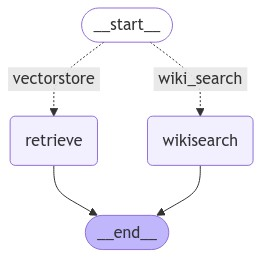

In [61]:
from IPython.display import Image, display
try:
  display(Image(app.get_graph().draw_mermaid_png()))
except Exception:
  # This requires some additiona dependencies and is optional
  pass


In [62]:
from pprint import pprint

# RUN
inputs = {
    "question": "what is RAG?"
}
for output in app.stream(inputs):
  for key, value in  output.items():
    # Node
    pprint(f"Node '{key}'")
    # optional: print full state at each node
    # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
  print("\n-----\n")

# Final generation
pprint(value['documents'])

----Route Question----
---Route Question to RAG----
------Retrieve----------


"Node 'retrieve'"

-----

[Document(metadata={'description': 'Prompt Engineering, also known as In-Context Prompting, refers to methods for how to communicate with LLM to steer its behavior for desired outcomes without updating the model weights. It is an empirical science and the effect of prompt engineering methods can vary a lot among models, thus requiring heavy experimentation and heuristics.\nThis post only focuses on prompt engineering for autoregressive language models, so nothing with Cloze tests, image generation or multimodality models.', 'language': 'en', 'source': 'https://lilianweng.github.io/posts/2023-03-15-prompt-engineering/', 'title': "Prompt Engineering | Lil'Log"}, page_content='RAG style, $p(a_i \\mid q) = \\sum_{i=1}^n p_\\text{tf-idf} (p_i \\mid q) \\cdot p_\\text{LM}(a_i \\mid q, p_i)$, where $p_\\text{tf-idf} (p_i \\mid q)$ is the normalized cosine similarities between the TF-IDF passage and question representations.\nNoisy channel inference, $p(a_i\\mid q) = 

In [70]:
from pprint import pprint

# RUN
inputs = {
    "question": "Avengesr"
}
for output in app.stream(inputs):
  print(output)
#   for key, value in  output.items():
#     # Node
#     pprint(f"Node '{key}'")
#     # optional: print full state at each node
#     # pprint.pprint(value["keys"], indent=2, width=80, depth=None)
#   print("\n-----\n")

# # Final generation
# pprint(value['documents'])

----Route Question----
----Route Question to wiki search----
------Retrieve----------


NameError: name 'question' is not defined